# Week 2: Calculus

In [2]:
#importing libraries
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Day 3: Numerical Optimization Methods
* So far we covered **exact** optimization, i.e. we calculated the minima/maxima of functions directly and exactly. This approach is not always the best
* There are cases when the function $f$ is so complex that differentiation may not be feasible
* In other cases soving the equation $f' = 0$ is not possible, at least not *analytically*, so we have to resort to approximating the solutions
* These, and similar scenarios, give rise to the methods for **numerical optimization** which avoid solving $f' = 0$ and might even avoid using derivatives at all. Today we discuss two such methods
* Numerical optimization algorithms are *iterative* by design -- they start with some initial approximation and they improve it until satisfactory result is obtained

### Gradient Descent Method
* This method finds the minimum of the input function (can be modified to work for finding maxima as well)
* Let $f(x)$ be the function we wish to minimize. We make an initial guess about the minimum, and we call this initial approximation $x_0$
* The method then generates an iterative sequence of improved approximations $x_1, x_2, \ldots, x_k, x_{k+1}, \ldots$ which are eve closer to the actual minimum of the function
* The recursive relation between the *current* iterate $x_k$ and the *next* iterate $x_{k+1}$ for $k = 1, 2, \ldots$ is given by:\begin{equation}
x_{k+1} = x_k - \alpha \cdot f'(x_k)
\end{equation}
where $\alpha$ is called **learning rate** of the algorithm which controls the speed of convergence (i.e. approaching to the minimum). The learning rate is usually set to be fairly small. In the basic form of the algorithm, it is constant throughout the iterations

### Example 1
Find the minimum of the function $f(x) = x^2$ using the Gradient Descent Method, initial approximation $x_0 = 4$ and learning rate $\alpha = 0.2$

In [5]:
# get variables and functions

x = sp.Symbol("x", real = True)
f = sp.Function("f", real = True)
df = sp.Function("df", real = True)

f = x**2
df = f.diff()

# define the derivative as a Python function (not SymPy!)

F = sp.lambdify(x, f)
Df = sp.lambdify(x, df)

# Initialize the results dataframe
results = pd.DataFrame(columns = ["k", "xk", "f(xk)", "f'(xk)"])

# run the algorithm
max_iter = 15
xk = 4.0
alpha = 0.2
k = 0

while k <= max_iter: # or we could use a for loop
    #add a row i the Dataframe
    row = [k, xk, F(xk), Df(xk)]
    results.loc[len(results)] = row
    
    #update the iteration
    xk = xk - alpha*Df(xk)
    k = k+1
    
print(results)

       k        xk      f(xk)    f'(xk)
0    0.0  4.000000  16.000000  8.000000
1    1.0  2.400000   5.760000  4.800000
2    2.0  1.440000   2.073600  2.880000
3    3.0  0.864000   0.746496  1.728000
4    4.0  0.518400   0.268739  1.036800
5    5.0  0.311040   0.096746  0.622080
6    6.0  0.186624   0.034829  0.373248
7    7.0  0.111974   0.012538  0.223949
8    8.0  0.067185   0.004514  0.134369
9    9.0  0.040311   0.001625  0.080622
10  10.0  0.024186   0.000585  0.048373
11  11.0  0.014512   0.000211  0.029024
12  12.0  0.008707   0.000076  0.017414
13  13.0  0.005224   0.000027  0.010449
14  14.0  0.003135   0.000010  0.006269
15  15.0  0.001881   0.000004  0.003761


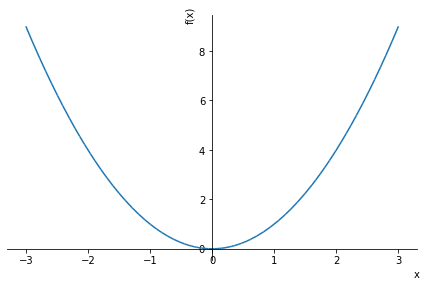

In [7]:
sp.plot(f, (x, -3, 3))

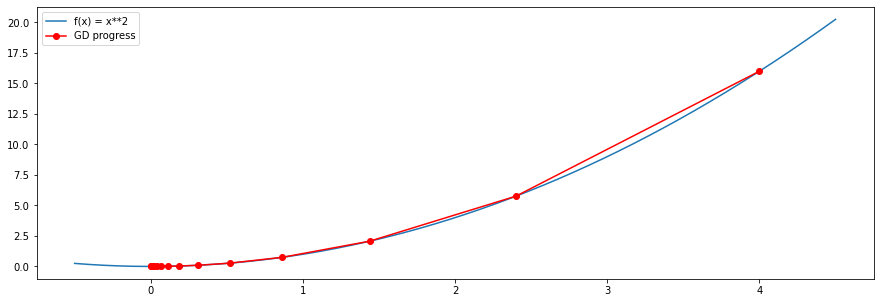

In [9]:
# Plot the sequence of points that approaches the minimum
xs = np.linspace(-0.5, 4.5, 1000)
ys = F(xs)

plt.figure(figsize=(15, 5))
plt.plot(xs, ys, label = "f(x) = x**2")
plt.plot(results['xk'], results['f(xk)'], label = 'GD progress', color = 'r', marker = 'o')
plt.legend()
plt.show()

### Example 2
Find the minimum of the function $g(x) = \displaystyle 1-\frac{\ln x}{2x+3}$ using the Gradient Descent Method, and initial approximation $x_0$ and learning rate $\alpha$ of your choosing.

In [ ]:
# define variables and functions



### Example 3
Find the **maximum** of the function $h(x) = \ln x - \sqrt{x}$ using the Gradient Descent Method, and initial approximation $x_0 = 1$ and learning rate $\alpha = 0.75$.

In [21]:
# define variables and functions

h = sp.Function("h", real = True)
dh = sp.Function("dh", real = True)

h = sp.log(x) - sp.sqrt(x)
dh = h.diff()

# define the derivative as a Python function (not SymPy!)

H = sp.lambdify(x, h)
Dh = sp.lambdify(x, dh)

# Initialize the results dataframe
results = pd.DataFrame(columns = ["k", "xk", "h(xk)", "h'(xk)"])

# run the algorithm
max_iter = 200
xk = 1.0
alpha = 0.8
k = 0

while k <= max_iter: # or we could use a for loop
    #add a row i the Dataframe
    row = [k, xk, H(xk), Dh(xk)]
    results.loc[len(results)] = row
    
    #update the iteration
    xk = xk + alpha*Dh(xk)
    k += 1
    
print(results.tail())


         k        xk     h(xk)    h'(xk)
196  196.0  3.991564 -0.613707  0.000264
197  197.0  3.991775 -0.613707  0.000258
198  198.0  3.991981 -0.613707  0.000251
199  199.0  3.992182 -0.613707  0.000245
200  200.0  3.992378 -0.613707  0.000239


### Stopping criterion based on $f'(x_k)$
* It is impossible to know how many iterations would be required to get a "good" approximation to the minimum
* Most frequently, we set a predetermined value for the maximum number of iterations we are *willing* to make
* Another approach is to check the absolute size of the derivative of the function, $|f'(x_k)|$; if this value is close to zero (in practice, less than some preset small *tolerance* threshold), we stop the algorithm since we are *sufficiently* close to a minimum point.
* Usual thresholds are $10^{-4}$ or $10^{-6}$ (i.e. `1e-4` or `1e-6`)
* Let's see this in practice with the modified parameters for the previous example

In [ ]:
# Test with the stopping criterion based on the derivative



### Putting the all of it together in a single function
* Write a Python function that will be an implementation of the Gradient Descent Method
* Input arguments are:
    * The function `f` and its derivative `df`
    * Initial approximation `x0`
    * Learning rate `alpha`, by default set to `0.01`
    * Maximum number of iterations `max_iter`, by default set to `500`
    * Tolerance level for the gradient `tol`, by default set to `1e-6`
* Output arguments are:
    * The minimum $x^*$
    * The minimum value $f(x^*)$
    * The absolute value of the derivative at the minimum, $\left|f'(x^*)\right|$
    * The number of iterations it took to obtain the result

In [ ]:
def gradient_descent(f, df, x0, alpha = 0.01, max_iter = 500, tol = 1e-6):
    
    
    return ...

### Checking built-in optimizers in SciPy's optimization module
* `SciPy` has a great selection of very robust *optimizers*
* Among others, we single out:
    * `bisect`
    * `golden`
    * `fmin`
    * `fmin_*method*`
    * `minimuze`

In [ ]:
# Import the scipy.optimize
import scipy.optimize as opt

In [ ]:
# Try some of the optimizers on the functions we defined
